<a href="https://colab.research.google.com/github/mikeytw11/Hockey/blob/main/Goalie_Consistency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Changes to make:
  1. Make the process more automated. Don't want to have to change/update every block of code.
  2. Automate loading in the logos for the table.
  

In [1]:
#Import Dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from IPython.core.display import HTML

In [2]:
#Import Data for Goalies
Goalies_Season = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Goalie_Totals.csv")
Dell_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Aaron%20Dell.csv")
Hill_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Adin%20Hill.csv")
Nedeljkovic_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Alex%20Nedeljkovic.csv")
Georgiev_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Alex%20Georgiev.csv")
Shesterkin_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Igor%20Shesterkin.csv")
Markstrom_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Jacob%20Markstrom.csv")
Vasilevskiy_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Andrei%20Vasilevskiy.csv")
Stolarz_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Anthony%20Stolarz.csv")
Forsberg_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Anton%20Forsberg.csv")
Raanta_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Anti%20Raanta.csv")
Holtby_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Braden%20Holtby.csv")
Elliot_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Brian%20Elliot.csv")
Petersen_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Cal%20Petersen.csv")
Talbot_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Cam%20Talbot.csv")
Hart_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Carter%20Hart.csv")
DeSmith_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Casey%20DeSmith.csv")
Primeau_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Cayden%20Primeau.csv")
Driedger_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Chris%20Driedger.csv")
Hellebuyck_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Connor%20Hellebuyck.csv")
Anderson_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Craig%20Anderson.csv")
Vladar_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Dan%20Vladar.csv")
Kuemper_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Darcy%20Kuemper.csv")
Rittich_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/David%20Rittich.csv")
Tokarski_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Dustin%20Tokarski.csv")
Merzlikins_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Elvis%20Merzlikins.csv")
Comrie_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Eric%20Comrie.csv")
Kallgren_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Erik%20Kallgren.csv")
Gustavsson_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Filip%20Gustavsson.csv")
Andersen_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Freddie%20Andersen.csv")
Samsonov_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Ilya%20Samsonov.csv")
Campbell_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Jack%20Campbell.csv")
Allen_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Jake%20Allen.csv")
Oettinger_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Jake%20Oettinger.csv")
Sorokin_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/lya%20Sorokin.csv")
Reimer_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/James%20Reimer.csv")
Halak_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Jaroslav%20Halak.csv")
Swayman_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Jeremy%20Swayman.csv")
Gibson_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/John%20Gibson.csv")
Gillies_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Jon%20Gillies.csv")
Quick_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Jonathan%20Quick.csv")
Korpisalo_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Joonas%20Korpisalo.csv")
Binnington_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Jordan%20Binnington.csv")
Saros_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Juuse%20Saros.csv")
Kahkonen_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Kaapo%20Kahkonen.csv")
Vejmelka_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Karel%20Vejmelka.csv")
Lankinen_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Kevin%20Lankinen.csv")
Brossoit_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Laurent%20Brossoit.csv")
Ullmark_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Linus%20Ullmark.csv")
Thompson_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Logan%20Thompson.csv")
Blackwood_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/MacKenzie%20Blackwood.csv")
Fleury_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Marc-Andre%20Fleury.csv")
Jones_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Martin%20Jones.csv")
Murray_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Matt%20Murray.csv")
Smith_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Mike%20Smith.csv")
Koskinen_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Mikko%20Koskinen.csv")
Daws_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Nico%20Daws.csv")
Francouz_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Pavel%20Francuoz.csv")
Mrazek_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Petr%20Mrazek.csv")
Grubauer_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Philipp%20Grubauer.csv")
Lehner_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Robin%20Lehner.csv")
Montembeault_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Sam%20Montembeault.csv")
Wedgewood_raw = pd.read_csv("https://raw.githubusercontent.com/mikeytw11/Hockey/main/NHL%20Goalies/Scott%20Wedgewood.csv")

In [3]:
#Drop Total row
Dell = Dell_raw.iloc[:-1, :]
Hill = Hill_raw.iloc[:-1, :]
Nedeljkovic = Nedeljkovic_raw.iloc[:-1, :]
Georgiev = Georgiev_raw.iloc[:-1, :]
Shesterkin = Shesterkin_raw.iloc[:-1, :]
Markstrom = Markstrom_raw.iloc[:-1, :]
Vasilevskiy = Vasilevskiy_raw.iloc[:-1, :]
Stolarz = Stolarz_raw.iloc[:-1, :]
Forsberg = Forsberg_raw.iloc[:-1, :]
Raanta = Raanta_raw.iloc[:-1, :]
Holtby = Holtby_raw.iloc[:-1, :]
Elliot = Elliot_raw.iloc[:-1, :]
Petersen = Petersen_raw.iloc[:-1, :]
Talbot = Talbot_raw.iloc[:-1, :]
Hart = Hart_raw.iloc[:-1, :]
DeSmith = DeSmith_raw.iloc[:-1, :]
Primeau = Primeau_raw.iloc[:-1, :]
Driedger = Driedger_raw.iloc[:-1, :]
Hellebuyck = Hellebuyck_raw.iloc[:-1, :]
Anderson = Anderson_raw.iloc[:-1, :]
Vladar = Vladar_raw.iloc[:-1, :]
Kuemper = Kuemper_raw.iloc[:-1, :]
Rittich = Rittich_raw.iloc[:-1, :]
Tokarski = Tokarski_raw.iloc[:-1, :]
Merzlikins = Merzlikins_raw.iloc[:-1, :]
Comrie = Comrie_raw.iloc[:-1, :]
Kallgren = Kallgren_raw.iloc[:-1, :]
Gustavsson = Gustavsson_raw.iloc[:-1, :]
Andersen = Andersen_raw.iloc[:-1, :]
Samsonov = Samsonov_raw.iloc[:-1, :]
Campbell = Campbell_raw.iloc[:-1, :]
Allen = Allen_raw.iloc[:-1, :]
Oettinger = Oettinger_raw.iloc[:-1, :]
Sorokin = Sorokin_raw.iloc[:-1, :]
Reimer = Reimer_raw.iloc[:-1, :]
Halak = Halak_raw.iloc[:-1, :]
Swayman = Swayman_raw.iloc[:-1, :]
Gibson = Gibson_raw.iloc[:-1, :]
Gillies = Gillies_raw.iloc[:-1, :]
Quick = Quick_raw.iloc[:-1, :]
Korpisalo = Korpisalo_raw.iloc[:-1, :]
Binnington = Binnington_raw.iloc[:-1, :]
Saros = Saros_raw.iloc[:-1, :]
Kahkonen = Kahkonen_raw.iloc[:-1, :]
Vejmelka = Vejmelka_raw.iloc[:-1, :]
Lankinen = Lankinen_raw.iloc[:-1, :]
Brossoit = Brossoit_raw.iloc[:-1, :]
Ullmark = Ullmark_raw.iloc[:-1, :]
Thompson = Thompson_raw.iloc[:-1, :]
Blackwood = Blackwood_raw.iloc[:-1, :]
Fleury = Fleury_raw.iloc[:-1, :]
Jones = Jones_raw.iloc[:-1, :]
Murray = Murray_raw.iloc[:-1, :]
Smith = Smith_raw.iloc[:-1, :]
Koskinen = Koskinen_raw.iloc[:-1, :]
Daws = Daws_raw.iloc[:-1, :]
Francouz = Francouz_raw.iloc[:-1, :]
Mrazek = Mrazek_raw.iloc[:-1, :]
Grubauer = Grubauer_raw.iloc[:-1, :]
Lehner = Lehner_raw.iloc[:-1, :]
Montembeault = Montembeault_raw.iloc[:-1, :]
Wedgewood = Wedgewood_raw.iloc[:-1, :]

In [4]:
# Find Mean of each goaltenders GSAx for the 2021-2022 season.
Mean_Dell = Dell['GSAx'].mean()
Mean_Hill = Hill['GSAx'].mean()
Mean_Nedeljkovic = Nedeljkovic['GSAx'].mean()
Mean_Georgiev = Georgiev['GSAx'].mean()
Mean_Shesterkin = Shesterkin['GSAx'].mean()
Mean_Markstrom = Markstrom['GSAx'].mean()
Mean_Vasilevskiy = Vasilevskiy['GSAx'].mean()
Mean_Stolarz = Stolarz['GSAx'].mean()
Mean_Forsberg = Forsberg['GSAx'].mean()
Mean_Raanta = Raanta['GSAx'].mean()
Mean_Holtby = Holtby['GSAx'].mean()
Mean_Elliot = Elliot['GSAx'].mean()
Mean_Petersen = Petersen['GSAx'].mean()
Mean_Talbot = Talbot['GSAx'].mean()
Mean_Hart = Hart['GSAx'].mean()
Mean_DeSmith = DeSmith['GSAx'].mean()
Mean_Primeau = Primeau['GSAx'].mean()
Mean_Driedger = Driedger['GSAx'].mean()
Mean_Hellebuyck = Hellebuyck['GSAx'].mean()
Mean_Anderson = Anderson['GSAx'].mean()
Mean_Vladar = Vladar['GSAx'].mean()
Mean_Kuemper = Kuemper['GSAx'].mean()
Mean_Rittich = Rittich['GSAx'].mean()
Mean_Tokarski = Tokarski['GSAx'].mean()
Mean_Merzlikins = Merzlikins['GSAx'].mean()
Mean_Comrie = Comrie['GSAx'].mean()
Mean_Kallgren = Kallgren['GSAx'].mean()
Mean_Gustavsson = Gustavsson['GSAx'].mean()
Mean_Andersen = Andersen['GSAx'].mean()
Mean_Samsonov = Samsonov['GSAx'].mean()
Mean_Campbell = Campbell['GSAx'].mean()
Mean_Allen = Allen['GSAx'].mean()
Mean_Oettinger = Oettinger['GSAx'].mean()
Mean_Sorokin = Sorokin['GSAx'].mean()
Mean_Reimer = Reimer['GSAx'].mean()
Mean_Halak = Halak['GSAx'].mean()
Mean_Swayman = Swayman['GSAx'].mean()
Mean_Gibson = Gibson['GSAx'].mean()
Mean_Gillies = Gillies['GSAx'].mean()
Mean_Quick = Quick['GSAx'].mean()
Mean_Korpisalo = Korpisalo['GSAx'].mean()
Mean_Binnington = Binnington['GSAx'].mean()
Mean_Saros = Saros['GSAx'].mean()
Mean_Kahkonen = Kahkonen['GSAx'].mean()
Mean_Vejmelka = Vejmelka['GSAx'].mean()
Mean_Lankinen = Lankinen['GSAx'].mean()
Mean_Brossoit = Brossoit['GSAx'].mean()
Mean_Ullmark = Ullmark['GSAx'].mean()
Mean_Thompson = Thompson['GSAx'].mean()
Mean_Blackwood = Blackwood['GSAx'].mean()
Mean_Fleury = Fleury['GSAx'].mean()
Mean_Jones = Jones['GSAx'].mean()
Mean_Murray = Murray['GSAx'].mean()
Mean_Smith = Smith['GSAx'].mean()
Mean_Koskinen = Koskinen['GSAx'].mean()
Mean_Daws = Daws['GSAx'].mean()
Mean_Francouz = Francouz['GSAx'].mean()
Mean_Mrazek = Mrazek['GSAx'].mean()
Mean_Grubauer = Grubauer['GSAx'].mean()
Mean_Lehner = Lehner['GSAx'].mean()
Mean_Montembeault = Montembeault['GSAx'].mean()
Mean_Wedgewood = Wedgewood['GSAx'].mean()

In [5]:
#Find N for each goaltender.
N_Dell = len(Dell)
N_Hill = len(Hill)
N_Nedeljkovic = len(Nedeljkovic)
N_Georgiev = len(Georgiev)
N_Shesterkin = len(Shesterkin)
N_Markstrom = len(Markstrom)
N_Vasilevskiy = len(Vasilevskiy)
N_Stolarz = len(Stolarz)
N_Forsberg = len(Forsberg)
N_Raanta = len(Raanta)
N_Holtby = len(Holtby)
N_Elliot = len(Elliot)
N_Petersen = len(Petersen)
N_Talbot = len(Talbot)
N_Hart = len(Hart)
N_DeSmith = len(DeSmith)
N_Primeau = len(Primeau)
N_Driedger = len(Driedger)
N_Hellebuyck = len(Hellebuyck)
N_Anderson = len(Anderson)
N_Vladar = len(Vladar)
N_Kuemper = len(Kuemper)
N_Rittich = len(Rittich)
N_Tokarski = len(Tokarski)
N_Merzlikins = len(Merzlikins)
N_Comrie = len(Comrie)
N_Kallgren = len(Kallgren)
N_Gustavsson = len(Gustavsson)
N_Andersen = len(Andersen)
N_Samsonov = len(Samsonov)
N_Campbell = len(Campbell)
N_Allen = len(Allen)
N_Oettinger = len(Oettinger)
N_Sorokin = len(Sorokin)
N_Reimer = len(Reimer)
N_Halak = len(Halak)
N_Swayman = len(Swayman)
N_Gibson = len(Gibson)
N_Gillies = len(Gillies)
N_Quick = len(Quick)
N_Korpisalo = len(Korpisalo)
N_Binnington = len(Binnington)
N_Saros = len(Saros)
N_Kahkonen = len(Kahkonen)
N_Vejmelka = len(Vejmelka)
N_Lankinen = len(Lankinen)
N_Brossoit = len(Brossoit)
N_Ullmark = len(Ullmark)
N_Thompson = len(Thompson)
N_Blackwood = len(Blackwood)
N_Fleury = len(Fleury)
N_Jones = len(Jones)
N_Murray = len(Murray)
N_Smith = len(Smith)
N_Koskinen = len(Koskinen)
N_Daws = len(Daws)
N_Francouz = len(Francouz)
N_Mrazek = len(Mrazek)
N_Grubauer = len(Grubauer)
N_Lehner = len(Lehner)
N_Montembeault = len(Montembeault)
N_Wedgewood = len(Wedgewood)

In [6]:
#Calculate goaltender variance.
Variance_Dell = round((sum((Dell['GSAx']-Mean_Dell)**2))/(N_Dell-1),2)
Variance_Hill = round((sum((Hill['GSAx']-Mean_Hill)**2))/(N_Hill-1),2)
Variance_Nedeljkovic = round((sum((Nedeljkovic['GSAx']-Mean_Nedeljkovic)**2))/(N_Nedeljkovic-1),2)
Variance_Georgiev = round((sum((Georgiev['GSAx']-Mean_Georgiev)**2))/(N_Georgiev-1),2)
Variance_Shesterkin = round((sum((Shesterkin['GSAx']-Mean_Shesterkin)**2))/(N_Shesterkin-1),2)
Variance_Markstrom = round((sum((Markstrom['GSAx']-Mean_Markstrom)**2))/(N_Markstrom-1),2)
Variance_Vasilevskiy = round((sum((Vasilevskiy['GSAx']-Mean_Vasilevskiy)**2))/(N_Vasilevskiy-1),2)
Variance_Stolarz = round((sum((Stolarz['GSAx']-Mean_Stolarz)**2))/(N_Stolarz-1),2)
Variance_Forsberg = round((sum((Forsberg['GSAx']-Mean_Forsberg)**2))/(N_Forsberg-1),2)
Variance_Raanta = round((sum((Raanta['GSAx']-Mean_Raanta)**2))/(N_Raanta-1),2)
Variance_Holtby = round((sum((Holtby['GSAx']-Mean_Holtby)**2))/(N_Holtby-1),2)
Variance_Elliot = round((sum((Elliot['GSAx']-Mean_Elliot)**2))/(N_Elliot-1),2)
Variance_Petersen = round((sum((Petersen['GSAx']-Mean_Petersen)**2))/(N_Petersen-1),2)
Variance_Talbot = round((sum((Talbot['GSAx']-Mean_Talbot)**2))/(N_Talbot-1),2)
Variance_Hart = round((sum((Hart['GSAx']-Mean_Hart)**2))/(N_Hart-1),2)
Variance_DeSmith = round((sum((DeSmith['GSAx']-Mean_DeSmith)**2))/(N_DeSmith-1),2)
Variance_Primeau = round((sum((Primeau['GSAx']-Mean_Primeau)**2))/(N_Primeau-1),2)
Variance_Driedger = round((sum((Driedger['GSAx']-Mean_Driedger)**2))/(N_Driedger-1),2)
Variance_Hellebuyck = round((sum((Hellebuyck['GSAx']-Mean_Hellebuyck)**2))/(N_Hellebuyck-1),2)
Variance_Anderson = round((sum((Anderson['GSAx']-Mean_Anderson)**2))/(N_Anderson-1),2)
Variance_Vladar = round((sum((Vladar['GSAx']-Mean_Vladar)**2))/(N_Vladar-1),2)
Variance_Kuemper = round((sum((Kuemper['GSAx']-Mean_Kuemper)**2))/(N_Kuemper-1),2)
Variance_Rittich = round((sum((Rittich['GSAx']-Mean_Rittich)**2))/(N_Rittich-1),2)
Variance_Tokarski = round((sum((Tokarski['GSAx']-Mean_Tokarski)**2))/(N_Tokarski-1),2)
Variance_Merzlikins = round((sum((Merzlikins['GSAx']-Mean_Merzlikins)**2))/(N_Merzlikins-1),2)
Variance_Comrie = round((sum((Comrie['GSAx']-Mean_Comrie)**2))/(N_Comrie-1),2)
Variance_Kallgren = round((sum((Kallgren['GSAx']-Mean_Kallgren)**2))/(N_Kallgren-1),2)
Variance_Gustavsson = round((sum((Gustavsson['GSAx']-Mean_Gustavsson)**2))/(N_Gustavsson-1),2)
Variance_Andersen = round((sum((Andersen['GSAx']-Mean_Andersen)**2))/(N_Andersen-1),2)
Variance_Samsonov = round((sum((Samsonov['GSAx']-Mean_Samsonov)**2))/(N_Samsonov-1),2)
Variance_Campbell = round((sum((Campbell['GSAx']-Mean_Campbell)**2))/(N_Campbell-1),2)
Variance_Allen = round((sum((Allen['GSAx']-Mean_Allen)**2))/(N_Allen-1),2)
Variance_Oettinger = round((sum((Oettinger['GSAx']-Mean_Oettinger)**2))/(N_Oettinger-1),2)
Variance_Sorokin = round((sum((Sorokin['GSAx']-Mean_Sorokin)**2))/(N_Sorokin-1),2)
Variance_Reimer = round((sum((Reimer['GSAx']-Mean_Reimer)**2))/(N_Reimer-1),2)
Variance_Halak = round((sum((Halak['GSAx']-Mean_Halak)**2))/(N_Halak-1),2)
Variance_Swayman = round((sum((Swayman['GSAx']-Mean_Swayman)**2))/(N_Swayman-1),2)
Variance_Gibson = round((sum((Gibson['GSAx']-Mean_Gibson)**2))/(N_Gibson-1),2)
Variance_Gillies = round((sum((Gillies['GSAx']-Mean_Gillies)**2))/(N_Gillies-1),2)
Variance_Quick = round((sum((Quick['GSAx']-Mean_Quick)**2))/(N_Quick-1),2)
Variance_Korpisalo = round((sum((Korpisalo['GSAx']-Mean_Korpisalo)**2))/(N_Korpisalo-1),2)
Variance_Binnington = round((sum((Binnington['GSAx']-Mean_Binnington)**2))/(N_Binnington-1),2)
Variance_Saros = round((sum((Saros['GSAx']-Mean_Saros)**2))/(N_Saros-1),2)
Variance_Kahkonen = round((sum((Kahkonen['GSAx']-Mean_Kahkonen)**2))/(N_Kahkonen-1),2)
Variance_Vejmelka = round((sum((Vejmelka['GSAx']-Mean_Vejmelka)**2))/(N_Vejmelka-1),2)
Variance_Lankinen = round((sum((Lankinen['GSAx']-Mean_Lankinen)**2))/(N_Lankinen-1),2)
Variance_Brossoit = round((sum((Brossoit['GSAx']-Mean_Brossoit)**2))/(N_Brossoit-1),2)
Variance_Ullmark = round((sum((Ullmark['GSAx']-Mean_Ullmark)**2))/(N_Ullmark-1),2)
Variance_Thompson = round((sum((Thompson['GSAx']-Mean_Thompson)**2))/(N_Thompson-1),2)
Variance_Blackwood = round((sum((Blackwood['GSAx']-Mean_Blackwood)**2))/(N_Blackwood-1),2)
Variance_Fleury = round((sum((Fleury['GSAx']-Mean_Fleury)**2))/(N_Fleury-1),2)
Variance_Jones = round((sum((Jones['GSAx']-Mean_Jones)**2))/(N_Jones-1),2)
Variance_Murray = round((sum((Murray['GSAx']-Mean_Murray)**2))/(N_Murray-1),2)
Variance_Smith = round((sum((Smith['GSAx']-Mean_Smith)**2))/(N_Smith-1),2)
Variance_Koskinen = round((sum((Koskinen['GSAx']-Mean_Koskinen)**2))/(N_Koskinen-1),2)
Variance_Daws = round((sum((Daws['GSAx']-Mean_Daws)**2))/(N_Daws-1),2)
Variance_Francouz = round((sum((Francouz['GSAx']-Mean_Francouz)**2))/(N_Francouz-1),2)
Variance_Mrazek = round((sum((Mrazek['GSAx']-Mean_Mrazek)**2))/(N_Mrazek-1),2)
Variance_Grubauer = round((sum((Grubauer['GSAx']-Mean_Grubauer)**2))/(N_Grubauer-1),2)
Variance_Lehner = round((sum((Lehner['GSAx']-Mean_Lehner)**2))/(N_Lehner-1),2)
Variance_Montembeault = round((sum((Montembeault['GSAx']-Mean_Montembeault)**2))/(N_Montembeault-1),2)
Variance_Wedgewood = round((sum((Wedgewood['GSAx']-Mean_Wedgewood)**2))/(N_Wedgewood-1),2)

In [7]:
#Keep only last row of raw data.
Dell_Final = Goalies_Season.loc[Goalies_Season.Player=='Aaron Dell']
Hill_Final = Goalies_Season.loc[Goalies_Season.Player=='Adin Hill']
Nedeljkovic_Final = Goalies_Season.loc[Goalies_Season.Player=='Alex Nedeljkovic']
Georgiev_Final = Goalies_Season.loc[Goalies_Season.Player=='Alexandar Georgiev']
Shesterkin_Final = Goalies_Season.loc[Goalies_Season.Player=='Igor Shesterkin']
Markstrom_Final = Goalies_Season.loc[Goalies_Season.Player=='Jacob Markstrom']
Vasilevskiy_Final = Goalies_Season.loc[Goalies_Season.Player=='Andrei Vasilevskiy']
Stolarz_Final = Goalies_Season.loc[Goalies_Season.Player=='Anthony Stolarz']
Forsberg_Final = Goalies_Season.loc[Goalies_Season.Player=='Anton Forsberg']
Raanta_Final = Goalies_Season.loc[Goalies_Season.Player=='Anti Raanta']
Holtby_Final = Goalies_Season.loc[Goalies_Season.Player=='Braden Holtby']
Elliot_Final = Goalies_Season.loc[Goalies_Season.Player=='Brian Elliot']
Petersen_Final = Goalies_Season.loc[Goalies_Season.Player=='Calvin Petersen']
Talbot_Final = Goalies_Season.loc[Goalies_Season.Player=='Cam Talbot']
Hart_Final = Goalies_Season.loc[Goalies_Season.Player=='Carter Hart']
DeSmith_Final = Goalies_Season.loc[Goalies_Season.Player=='Casey DeSmith']
Primeau_Final = Goalies_Season.loc[Goalies_Season.Player=='Cayden Primeau']
Driedger_Final = Goalies_Season.loc[Goalies_Season.Player=='Chris Driedger']
Hellebuyck_Final = Goalies_Season.loc[Goalies_Season.Player=='Connor Hellebuyck']
Anderson_Final = Goalies_Season.loc[Goalies_Season.Player=='Craig Anderson']
Vladar_Final = Goalies_Season.loc[Goalies_Season.Player=='Dan Vladar']
Kuemper_Final = Goalies_Season.loc[Goalies_Season.Player=='Darcy Kuemper']
Rittich_Final = Goalies_Season.loc[Goalies_Season.Player=='David Rittich']
Tokarski_Final = Goalies_Season.loc[Goalies_Season.Player=='Dustin Tokarski']
Merzlikins_Final = Goalies_Season.loc[Goalies_Season.Player=='Elvis Merzlikins']
Comrie_Final = Goalies_Season.loc[Goalies_Season.Player=='Eric Comrie']
Kallgren_Final = Goalies_Season.loc[Goalies_Season.Player=='Erik Kallgren']
Gustavsson_Final = Goalies_Season.loc[Goalies_Season.Player=='Filip Gustavsson']
Andersen_Final = Goalies_Season.loc[Goalies_Season.Player=='Frederik Andersen']
Samsonov_Final = Goalies_Season.loc[Goalies_Season.Player=='Ilya Samsonov']
Campbell_Final = Goalies_Season.loc[Goalies_Season.Player=='Jack Campbell']
Allen_Final = Goalies_Season.loc[Goalies_Season.Player=='Jake Allen']
Oettinger_Final = Goalies_Season.loc[Goalies_Season.Player=='Jake Oettinger']
Sorokin_Final = Goalies_Season.loc[Goalies_Season.Player=='Ilya Sorokin']
Reimer_Final = Goalies_Season.loc[Goalies_Season.Player=='James Reimer']
Halak_Final = Goalies_Season.loc[Goalies_Season.Player=='Jaroslav Halak']
Swayman_Final = Goalies_Season.loc[Goalies_Season.Player=='Jeremy Swayman']
Gibson_Final = Goalies_Season.loc[Goalies_Season.Player=='John Gibson']
Gillies_Final = Goalies_Season.loc[Goalies_Season.Player=='Jon Gillies']
Quick_Final = Goalies_Season.loc[Goalies_Season.Player=='Jonathan Quick']
Korpisalo_Final = Goalies_Season.loc[Goalies_Season.Player=='Joonas Korpisalo']
Binnington_Final = Goalies_Season.loc[Goalies_Season.Player=='Jordan Binnington']
Saros_Final = Goalies_Season.loc[Goalies_Season.Player=='Juuse Saros']
Kahkonen_Final = Goalies_Season.loc[Goalies_Season.Player=='Kaapo Kahkonen']
Vejmelka_Final = Goalies_Season.loc[Goalies_Season.Player=='Karel Vejmelka']
Lankinen_Final = Goalies_Season.loc[Goalies_Season.Player=='Kevin Lankinen']
Brossoit_Final = Goalies_Season.loc[Goalies_Season.Player=='Laurent Brossoit']
Ullmark_Final = Goalies_Season.loc[Goalies_Season.Player=='Linus Ullmark']
Thompson_Final = Goalies_Season.loc[Goalies_Season.Player=='Logan Thompson']
Blackwood_Final = Goalies_Season.loc[Goalies_Season.Player=='Mackenzie Blackwood']
Fleury_Final = Goalies_Season.loc[Goalies_Season.Player=='Marc-Andre Fleury']
Jones_Final = Goalies_Season.loc[Goalies_Season.Player=='Martin Jones']
Murray_Final = Goalies_Season.loc[Goalies_Season.Player=='Matt Murray']
Smith_Final = Goalies_Season.loc[Goalies_Season.Player=='Mike Smith']
Koskinen_Final = Goalies_Season.loc[Goalies_Season.Player=='Mikko Koskinen']
Daws_Final = Goalies_Season.loc[Goalies_Season.Player=='Nico Daws']
Francouz_Final = Goalies_Season.loc[Goalies_Season.Player=='Pavel Francouz']
Mrazek_Final = Goalies_Season.loc[Goalies_Season.Player=='Petr Mrazek']
Grubauer_Final = Goalies_Season.loc[Goalies_Season.Player=='Philipp Grubauer']
Lehner_Final = Goalies_Season.loc[Goalies_Season.Player=='Robin Lehner']
Montembeault_Final = Goalies_Season.loc[Goalies_Season.Player=='Sam Montembeault']
Wedgewood_Final = Goalies_Season.loc[Goalies_Season.Player=='Scott Wedgewood']

In [8]:
#Restrict data columns.
Dell_Final = Dell_Final.drop(columns = ['Position','GSAA','Team'])
Hill_Final = Hill_Final.drop(columns = ['Position','GSAA','Team'])
Nedeljkovic_Final = Nedeljkovic_Final.drop(columns = ['Position','GSAA','Team'])
Georgiev_Final = Georgiev_Final.drop(columns = ['Position','GSAA','Team'])
Shesterkin_Final = Shesterkin_Final.drop(columns = ['Position','GSAA','Team'])
Markstrom_Final = Markstrom_Final.drop(columns = ['Position','GSAA','Team'])
Vasilevskiy_Final = Vasilevskiy_Final.drop(columns = ['Position','GSAA','Team'])
Stolarz_Final = Stolarz_Final.drop(columns = ['Position','GSAA','Team'])
Forsberg_Final = Forsberg_Final.drop(columns = ['Position','GSAA','Team'])
Raanta_Final = Raanta_Final.drop(columns = ['Position','GSAA','Team'])
Holtby_Final = Holtby_Final.drop(columns = ['Position','GSAA','Team'])
Elliot_Final = Elliot_Final.drop(columns = ['Position','GSAA','Team'])
Petersen_Final = Petersen_Final.drop(columns = ['Position','GSAA','Team'])
Talbot_Final = Talbot_Final.drop(columns = ['Position','GSAA','Team'])
Hart_Final = Hart_Final.drop(columns = ['Position','GSAA','Team'])
DeSmith_Final = DeSmith_Final.drop(columns = ['Position','GSAA','Team'])
Primeau_Final = Primeau_Final.drop(columns = ['Position','GSAA','Team'])
Driedger_Final = Driedger_Final.drop(columns = ['Position','GSAA','Team'])
Hellebuyck_Final = Hellebuyck_Final.drop(columns = ['Position','GSAA','Team'])
Anderson_Final = Anderson_Final.drop(columns = ['Position','GSAA','Team'])
Vladar_Final = Vladar_Final.drop(columns = ['Position','GSAA','Team'])
Kuemper_Final = Kuemper_Final.drop(columns = ['Position','GSAA','Team'])
Rittich_Final = Rittich_Final.drop(columns = ['Position','GSAA','Team'])
Tokarski_Final = Tokarski_Final.drop(columns = ['Position','GSAA','Team'])
Merzlikins_Final = Merzlikins_Final.drop(columns = ['Position','GSAA','Team'])
Comrie_Final = Comrie_Final.drop(columns = ['Position','GSAA','Team'])
Kallgren_Final = Kallgren_Final.drop(columns = ['Position','GSAA','Team'])
Gustavsson_Final = Gustavsson_Final.drop(columns = ['Position','GSAA','Team'])
Andersen_Final = Andersen_Final.drop(columns = ['Position','GSAA','Team'])
Samsonov_Final = Samsonov_Final.drop(columns = ['Position','GSAA','Team'])
Campbell_Final = Campbell_Final.drop(columns = ['Position','GSAA','Team'])
Allen_Final = Allen_Final.drop(columns = ['Position','GSAA','Team'])
Oettinger_Final = Oettinger_Final.drop(columns = ['Position','GSAA','Team'])
Sorokin_Final = Sorokin_Final.drop(columns = ['Position','GSAA','Team'])
Reimer_Final = Reimer_Final.drop(columns = ['Position','GSAA','Team'])
Halak_Final = Halak_Final.drop(columns = ['Position','GSAA','Team'])
Swayman_Final = Swayman_Final.drop(columns = ['Position','GSAA','Team'])
Gibson_Final = Gibson_Final.drop(columns = ['Position','GSAA','Team'])
Gillies_Final = Gillies_Final.drop(columns = ['Position','GSAA','Team'])
Quick_Final = Quick_Final.drop(columns = ['Position','GSAA','Team'])
Korpisalo_Final = Korpisalo_Final.drop(columns = ['Position','GSAA','Team'])
Binnington_Final = Binnington_Final.drop(columns = ['Position','GSAA','Team'])
Saros_Final = Saros_Final.drop(columns = ['Position','GSAA','Team'])
Kahkonen_Final = Kahkonen_Final.drop(columns = ['Position','GSAA','Team'])
Vejmelka_Final = Vejmelka_Final.drop(columns = ['Position','GSAA','Team'])
Lankinen_Final = Lankinen_Final.drop(columns = ['Position','GSAA','Team'])
Brossoit_Final = Brossoit_Final.drop(columns = ['Position','GSAA','Team'])
Ullmark_Final = Ullmark_Final.drop(columns = ['Position','GSAA','Team'])
Thompson_Final = Thompson_Final.drop(columns = ['Position','GSAA','Team'])
Blackwood_Final = Blackwood_Final.drop(columns = ['Position','GSAA','Team'])
Fleury_Final = Fleury_Final.drop(columns = ['Position','GSAA','Team'])
Jones_Final = Jones_Final.drop(columns = ['Position','GSAA','Team'])
Murray_Final = Murray_Final.drop(columns = ['Position','GSAA','Team'])
Smith_Final = Smith_Final.drop(columns = ['Position','GSAA','Team'])
Koskinen_Final = Koskinen_Final.drop(columns = ['Position','GSAA','Team'])
Daws_Final = Daws_Final.drop(columns = ['Position','GSAA','Team'])
Francouz_Final = Francouz_Final.drop(columns = ['Position','GSAA','Team'])
Mrazek_Final = Mrazek_Final.drop(columns = ['Position','GSAA','Team'])
Grubauer_Final = Grubauer_Final.drop(columns = ['Position','GSAA','Team'])
Lehner_Final = Lehner_Final.drop(columns = ['Position','GSAA','Team'])
Montembeault_Final = Montembeault_Final.drop(columns = ['Position','GSAA','Team'])
Wedgewood_Final = Wedgewood_Final.drop(columns = ['Position','GSAA','Team'])

In [9]:
#Add Variance column to goaltender data.
Dell_Final['Variance'] = Variance_Dell
Hill_Final['Variance'] = Variance_Hill
Nedeljkovic_Final['Variance'] = Variance_Nedeljkovic
Georgiev_Final['Variance'] = Variance_Georgiev
Shesterkin_Final['Variance'] = Variance_Shesterkin
Markstrom_Final['Variance'] = Variance_Markstrom
Vasilevskiy_Final['Variance'] = Variance_Vasilevskiy
Stolarz_Final['Variance'] = Variance_Stolarz
Forsberg_Final['Variance'] = Variance_Forsberg
Raanta_Final['Variance'] = Variance_Raanta
Holtby_Final['Variance'] = Variance_Holtby
Elliot_Final['Variance'] = Variance_Elliot
Petersen_Final['Variance'] = Variance_Petersen
Talbot_Final['Variance'] = Variance_Talbot
Hart_Final['Variance'] = Variance_Hart
DeSmith_Final['Variance'] = Variance_DeSmith
Primeau_Final['Variance'] = Variance_Primeau
Driedger_Final['Variance'] = Variance_Driedger
Hellebuyck_Final['Variance'] = Variance_Hellebuyck
Anderson_Final['Variance'] = Variance_Anderson
Vladar_Final['Variance'] = Variance_Vladar
Kuemper_Final['Variance'] = Variance_Kuemper
Rittich_Final['Variance'] = Variance_Rittich
Tokarski_Final['Variance'] = Variance_Tokarski
Merzlikins_Final['Variance'] = Variance_Merzlikins
Comrie_Final['Variance'] = Variance_Comrie
Kallgren_Final['Variance'] = Variance_Kallgren
Gustavsson_Final['Variance'] = Variance_Gustavsson
Andersen_Final['Variance'] = Variance_Andersen
Samsonov_Final['Variance'] = Variance_Samsonov
Campbell_Final['Variance'] = Variance_Campbell
Allen_Final['Variance'] = Variance_Allen
Oettinger_Final['Variance'] = Variance_Oettinger
Sorokin_Final['Variance'] = Variance_Sorokin
Reimer_Final['Variance'] = Variance_Reimer
Halak_Final['Variance'] = Variance_Halak
Swayman_Final['Variance'] = Variance_Swayman
Gibson_Final['Variance'] = Variance_Gibson
Gillies_Final['Variance'] = Variance_Gillies
Quick_Final['Variance'] = Variance_Quick
Korpisalo_Final['Variance'] = Variance_Korpisalo
Binnington_Final['Variance'] = Variance_Binnington
Saros_Final['Variance'] = Variance_Saros
Kahkonen_Final['Variance'] = Variance_Kahkonen
Vejmelka_Final['Variance'] = Variance_Vejmelka
Lankinen_Final['Variance'] = Variance_Lankinen
Brossoit_Final['Variance'] = Variance_Brossoit
Ullmark_Final['Variance'] = Variance_Ullmark
Thompson_Final['Variance'] = Variance_Thompson
Blackwood_Final['Variance'] = Variance_Blackwood
Fleury_Final['Variance'] = Variance_Fleury
Jones_Final['Variance'] = Variance_Jones
Murray_Final['Variance'] = Variance_Murray
Smith_Final['Variance'] = Variance_Smith
Koskinen_Final['Variance'] = Variance_Koskinen
Daws_Final['Variance'] = Variance_Daws
Francouz_Final['Variance'] = Variance_Francouz
Mrazek_Final['Variance'] = Variance_Mrazek
Grubauer_Final['Variance'] = Variance_Grubauer
Lehner_Final['Variance'] = Variance_Lehner
Montembeault_Final['Variance'] = Variance_Montembeault
Wedgewood_Final['Variance'] = Variance_Wedgewood

In [10]:
#Merge goaltenders together
Goalie_Table = pd.concat([Dell_Final, Hill_Final, Nedeljkovic_Final, Georgiev_Final, Shesterkin_Final, Markstrom_Final, Vasilevskiy_Final, Stolarz_Final, Forsberg_Final,
                          Raanta_Final, Holtby_Final, Elliot_Final, Petersen_Final, Talbot_Final, Hart_Final, DeSmith_Final, Primeau_Final, Driedger_Final, Hellebuyck_Final,
                          Anderson_Final, Vladar_Final, Kuemper_Final, Rittich_Final, Tokarski_Final, Merzlikins_Final, Comrie_Final, Kallgren_Final, Gustavsson_Final,
                          Andersen_Final, Samsonov_Final, Campbell_Final, Allen_Final, Oettinger_Final, Sorokin_Final, Reimer_Final, Halak_Final, Swayman_Final, Gibson_Final,
                          Gillies_Final, Quick_Final, Korpisalo_Final, Binnington_Final, Saros_Final, Kahkonen_Final, Vejmelka_Final, Lankinen_Final, Brossoit_Final,
                          Ullmark_Final, Thompson_Final, Blackwood_Final, Fleury_Final, Jones_Final, Murray_Final, Smith_Final, Koskinen_Final, Daws_Final, Francouz_Final,
                          Mrazek_Final, Grubauer_Final, Lehner_Final, Montembeault_Final, Wedgewood_Final])
Goalie_Table = Goalie_Table.reset_index(drop=True)
Goalie_Table

,Player,Season,GP,TOI,GA,SA,FA,xGA,Sv%,FSv%,xFSv%,dFSv%,GSAx,Variance
0,Aaron Dell,21-22,12,565.38,37.95,356.65,467.99,30.45,89.36,91.89,93.49,-1.60,-7.50,2.15
1,Adin Hill,21-22,25,1375.95,62.41,665.70,927.62,55.50,90.62,93.27,94.02,-0.74,-6.91,2.37
2,Alex Nedeljkovic,21-22,59,3230.80,180.28,1830.85,2425.82,168.76,90.15,92.57,93.04,-0.47,-11.52,3.57
3,Alexandar Georgiev,21-22,33,1746.10,84.06,833.10,1190.45,78.76,89.91,92.94,93.38,-0.45,-5.30,3.12
4,Igor Shesterkin,21-22,53,3070.53,106.34,1603.19,2195.64,143.52,93.37,95.16,93.46,1.69,37.18,1.87
5,Jacob Markstrom,21-22,63,3695.83,136.53,1719.18,2342.66,152.14,92.06,94.17,93.51,0.67,15.61,1.98
6,Andrei Vasilevskiy,21-22,63,3760.75,154.97,1862.28,2561.07,172.88,91.68,93.95,93.25,0.70,17.91,1.26
7,Anthony Stolarz,21-22,28,1506.42,67.02,817.13,1120.82,71.57,91.80,94.02,93.61,0.41,4.55,2.24
8,Anton Forsberg,21-22,46,2571.45,119.85,1437.92,1932.30,131.34,91.67,93.80,93.20,0.59,11.49,2.53
9,Braden Holtby,21-22,24,1318.47,60.85,701.27,968.57,59.73,91.32,93.72,93.83,-0.12,-1.12,1.92


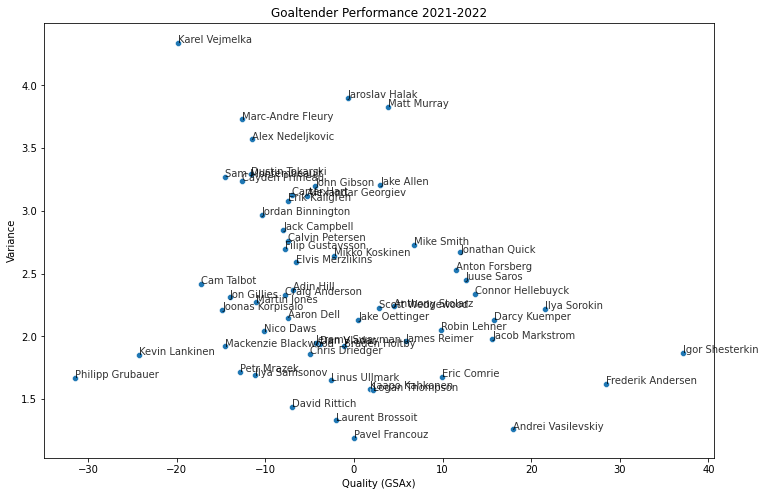

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=Goalie_Table, x='GSAx', y='Variance')
plt.title(f"Goaltender Performance 2021-2022")
plt.xlabel('Quality (GSAx)')
plt.ylabel('Variance')
          
for i in range(Goalie_Table.shape[0]):
          plt.text(Goalie_Table.GSAx[i], y=Goalie_Table.Variance[i], s=Goalie_Table.Player[i], alpha=0.8)

plt.show()

In [12]:
#Add Team Logos to Goalie Dataframe.
Logos = ['https://loodibee.com/wp-content/uploads/nhl-buffalo-sabres-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-san-jose-sharks-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-detroit-red-wings-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-new-york-rangers-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-new-york-rangers-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-calgary-flames-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-tampa-bay-lightning-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-anaheim-ducks-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-ottawa-senators-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-dallas-stars-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-los-angeles-kings-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-minnesota-wild-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-philadelphia-flyers-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-montreal-canadiens-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-seattle-kraken-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-winnipeg-jets-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-buffalo-sabres-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-calgary-flames-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-colorado-avalanche-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-nashville-predators-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-buffalo-sabres-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-columbus-blue-jackets-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-winnipeg-jets-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-toronto-maple-leafs-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-ottawa-senators-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-carolina-hurricanes-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-washington-capitals-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-toronto-maple-leafs-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-montreal-canadiens-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-dallas-stars-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-new-york-islanders-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-san-jose-sharks-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-vancouver-canucks-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-boston-bruins-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-anaheim-ducks-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-new-jersey-devils-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-los-angeles-kings-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-columbus-blue-jackets-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-st-louis-blues-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-nashville-predators-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-san-jose-sharks-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-arizona-coyotes-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-chicago-blackhawks-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-vegas-golden-knights-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-boston-bruins-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-vegas-golden-knights-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-new-jersey-devils-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-minnesota-wild-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-philadelphia-flyers-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-ottawa-senators-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-edmonton-oilers-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-edmonton-oilers-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-new-jersey-devils-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-colorado-avalanche-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-toronto-maple-leafs-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-seattle-kraken-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-vegas-golden-knights-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-montreal-canadiens-logo.png',
         'https://loodibee.com/wp-content/uploads/nhl-dallas-stars-logo.png']
Goalie_Table['Team'] = Logos
Goalie_Table = Goalie_Table.loc[:,['Player','Season','Team','GP','TOI','GA','SA','FA','xGA','Sv%','FSv%','xFSv%','dFSv%','GSAx','Variance']]
#Converting links to html tags
def path_to_image_html(path):
  return '<img src="'+ path + '"width="30">'
#Rendering the dataframe as HTML table
Goalie_Table.to_html(escape=False, formatters=dict(Team=path_to_image_html))
#Rendering the images in the dataframe using the HTML method.
HTML(Goalie_Table.to_html(escape=False, formatters=dict(Team=path_to_image_html)))

,Player,Season,Team,GP,TOI,GA,SA,FA,xGA,Sv%,FSv%,xFSv%,dFSv%,GSAx,Variance
0,Aaron Dell,21-22,,12,565.38,37.95,356.65,467.99,30.45,89.36,91.89,93.49,-1.60,-7.50,2.15
1,Adin Hill,21-22,,25,1375.95,62.41,665.70,927.62,55.50,90.62,93.27,94.02,-0.74,-6.91,2.37
2,Alex Nedeljkovic,21-22,,59,3230.80,180.28,1830.85,2425.82,168.76,90.15,92.57,93.04,-0.47,-11.52,3.57
3,Alexandar Georgiev,21-22,,33,1746.10,84.06,833.10,1190.45,78.76,89.91,92.94,93.38,-0.45,-5.30,3.12
4,Igor Shesterkin,21-22,,53,3070.53,106.34,1603.19,2195.64,143.52,93.37,95.16,93.46,1.69,37.18,1.87
5,Jacob Markstrom,21-22,,63,3695.83,136.53,1719.18,2342.66,152.14,92.06,94.17,93.51,0.67,15.61,1.98
6,Andrei Vasilevskiy,21-22,,63,3760.75,154.97,1862.28,2561.07,172.88,91.68,93.95,93.25,0.70,17.91,1.26
7,Anthony Stolarz,21-22,,28,1506.42,67.02,817.13,1120.82,71.57,91.80,94.02,93.61,0.41,4.55,2.24
8,Anton Forsberg,21-22,,46,2571.45,119.85,1437.92,1932.30,131.34,91.67,93.80,93.20,0.59,11.49,2.53
9,Braden Holtby,21-22,,24,1318.47,60.85,701.27,968.57,59.73,91.32,93.72,93.83,-0.12,-1.12,1.92
